In [2]:
import xarray as xr
import numpy as np
import pyopenfoam as pyof
from pathlib import Path

In [4]:
case_path = Path("CASES/dry_1440__flood_720/organizedData/")

velocity_probe = pyof.boundaryProbe(
    path_data=case_path/"points_U.xy", 
    path_time=case_path/"time.txt",
    path_xyz=case_path/"xyz.txt")

In [6]:
velocity_probe.dimensionality


In [9]:
velocity_probe.n_fields

1

In [11]:
full_data = np.loadtxt(velocity_probe.path_data).T

In [12]:

data = dict()

for i, field in enumerate(["Ux", "Uy", "Uz"]):
 
    data[field] = xr.DataArray(
        full_data[i :: velocity_probe.n_fields*3],
        dims=("probe", "time"),
        coords={"probe": velocity_probe.probes_points, "time": velocity_probe.list_of_times},
    )

    velocity_probe.array_data = xr.Dataset(
        data, coords={"time": velocity_probe.list_of_times, "probes": velocity_probe.probes_points}
    )

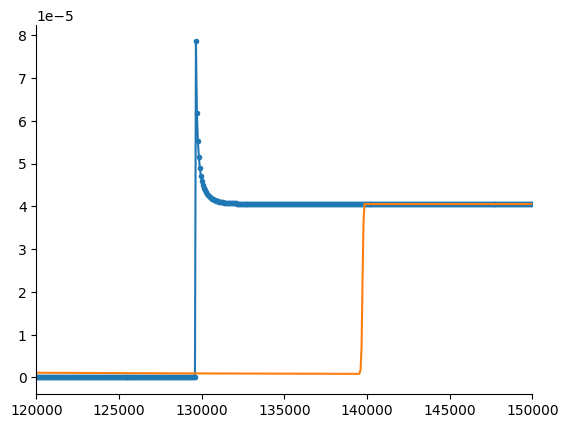

In [40]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(data["Uz"].time, np.abs(data["Uz"][1].data), label="Top", marker=".")
ax.plot(data["Uz"].time, np.abs(data["Uz"][0].data), label="Bottom")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(120_000, 150_000)
plt.show()


In [31]:
data["Uz"].time

<xarray.DataArray 'time' (time: 11520)>
array([5.877900e+01, 1.175960e+02, 1.775960e+02, ..., 6.910536e+05,
       6.911136e+05, 6.911736e+05])
Coordinates:
  * time     (time) float64 58.78 117.6 177.6 ... 6.911e+05 6.911e+05 6.912e+05